In [84]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

# Directory:
# dir = 'not-flipped/'
# dir = 'flipped/'
dir = 'build-channel/'

# Load data from output txt file:
data = np.loadtxt(dir+'det.txt')

# Number of events:
nEvents = 10

# For setting axis limits:
min = -0.3; max = 0.3

In [85]:
# Values from detector:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
Lz_vals = []
t_vals = []
EventIDs = []
for i in range(data.shape[0]):
    x = data[i][0]; y = data[i][1]; z = data[i][2] # mm
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    Lz_vals.append(x*py-y*px)
    t = data[i][6]
    t_vals.append(t) # ns
    EventIDs.append(data[i][8])
    del px, py, pz, t

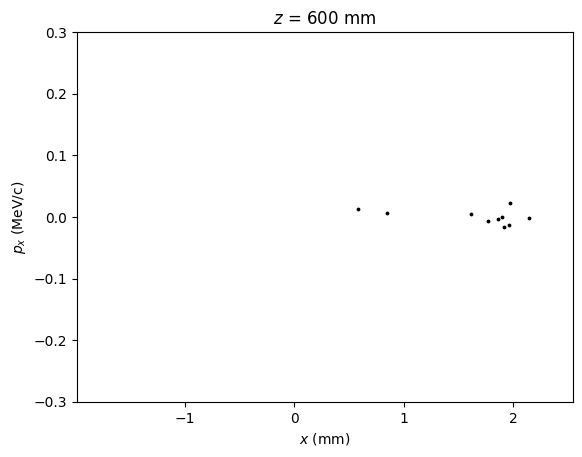

In [86]:
# Animate phase space (x) evolution along z:
unique_z = np.unique(z_vals)
data_by_z = []
for z in unique_z:
    temp_x = [x for x, z_val in zip(x_vals, z_vals) if z_val == z]
    temp_px = [px for px, z_val in zip(px_vals, z_vals) if z_val == z]
    data_by_z.append((temp_x, temp_px))
fig, ax = plt.subplots()
sc = ax.scatter([], [], s=3,color='black')
ax.set_xlim(np.min(x_vals), np.max(x_vals))
# ax.set_ylim(np.min(px_vals), np.max(px_vals))
ax.set_ylim(min,max)
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$p_x$ (MeV/c)')
title = ax.set_title("")
def update(frame):
    x, px = data_by_z[frame]
    sc.set_offsets(np.column_stack((x, px)))
    title.set_text(f'$z$ = {int(unique_z[frame])} mm')
    return sc, title
ani = FuncAnimation(fig, update, frames=len(unique_z), interval=500, blit=False)
ani.save(dir+'phase_space_x_animation.gif', writer='pillow')

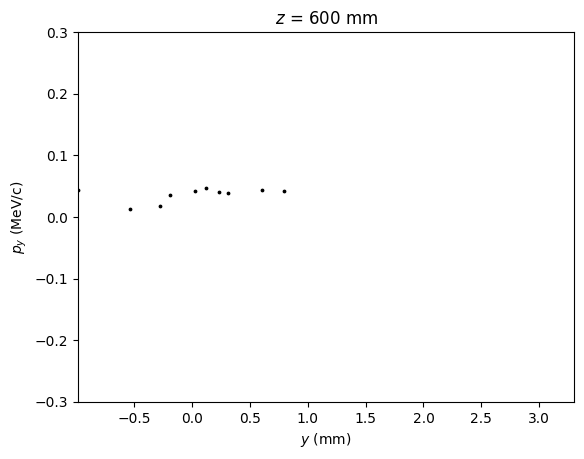

In [87]:
# Animate phase space (y) evolution along z:
unique_z = np.unique(z_vals)
data_by_z = []
for z in unique_z:
    temp_y = [y for y, z_val in zip(y_vals, z_vals) if z_val == z]
    temp_py = [py for py, z_val in zip(py_vals, z_vals) if z_val == z]
    data_by_z.append((temp_y, temp_py))
fig, ax = plt.subplots()
sc = ax.scatter([], [], s=3,color='black')
ax.set_xlim(np.min(y_vals), np.max(y_vals))
# ax.set_ylim(np.min(py_vals), np.max(py_vals))
ax.set_ylim(min,max)
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$p_y$ (MeV/c)')
title = ax.set_title("")
def update(frame):
    y, py = data_by_z[frame]
    sc.set_offsets(np.column_stack((y, py)))
    title.set_text(f'$z$ = {int(unique_z[frame])} mm')
    return sc, title
ani = FuncAnimation(fig, update, frames=len(unique_z), interval=500, blit=False)
ani.save(dir+'phase_space_y_animation.gif', writer='pillow')

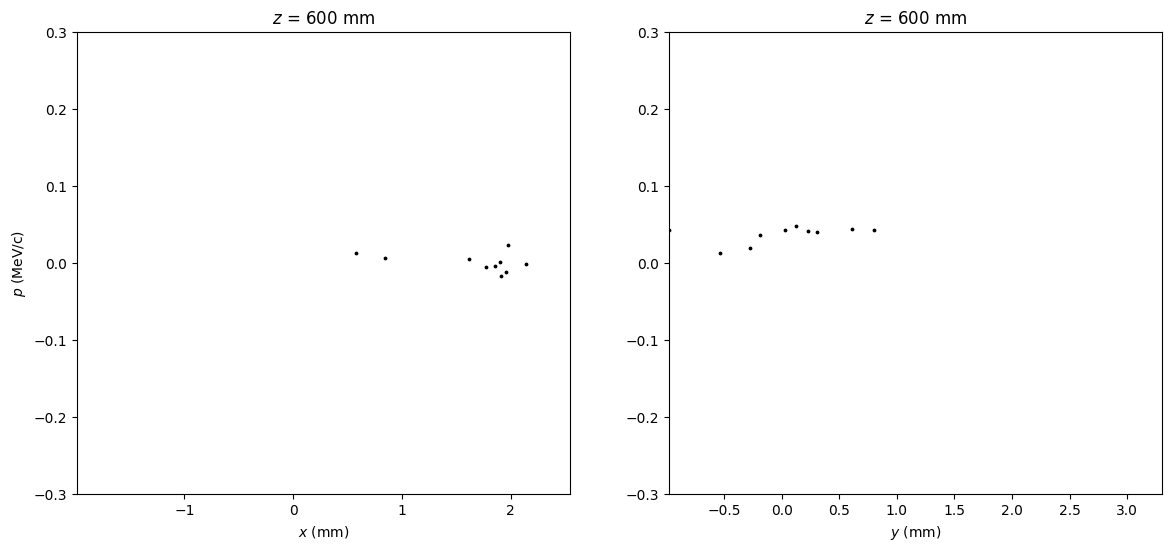

In [88]:
# Animate phase space (subplot x and y) evolution along z:
unique_z = np.unique(z_vals)
data_by_z1 = []
data_by_z2 = []
for z in unique_z:
    # x:
    temp_x = [x for x, z_val in zip(x_vals, z_vals) if z_val == z]
    temp_px = [px for px, z_val in zip(px_vals, z_vals) if z_val == z]
    data_by_z1.append((temp_x, temp_px))
    # y:
    temp_y = [y for y, z_val in zip(y_vals, z_vals) if z_val == z]
    temp_py = [py for py, z_val in zip(py_vals, z_vals) if z_val == z]
    data_by_z2.append((temp_y, temp_py))
fig, ax = plt.subplots(1,2,figsize = (14,6))
# x:
sc1 = ax[0].scatter([], [], s=3,color='black')
ax[0].set_xlim(np.min(x_vals), np.max(x_vals))
# ax[0].set_ylim(np.min(px_vals), np.max(px_vals))
ax[0].set_ylim(min,max)
ax[0].set_xlabel('$x$ (mm)')
# ax[0].set_ylabel('$p_x$ (MeV/c)')
ax[0].set_ylabel('$p$ (MeV/c)')
title1 = ax[0].set_title("")
# y:
sc2 = ax[1].scatter([], [], s=3,color='black')
ax[1].set_xlim(np.min(y_vals), np.max(y_vals))
# ax[1].set_ylim(np.min(py_vals), np.max(py_vals))
ax[1].set_ylim(min,max)
ax[1].set_xlabel('$y$ (mm)')
# ax[1].set_ylabel('$p_y$ (MeV/c)')
title2 = ax[1].set_title("")
def update(frame):
    x, px = data_by_z1[frame]
    y, py = data_by_z2[frame]
    sc1.set_offsets(np.column_stack((x, px)))
    sc2.set_offsets(np.column_stack((y, py)))
    title1.set_text(f'$z$ = {int(unique_z[frame])} mm')
    title2.set_text(f'$z$ = {int(unique_z[frame])} mm')
    return sc, title
ani = FuncAnimation(fig, update, frames=len(unique_z), interval=500, blit=False)
ani.save(dir+'phase_space_subplot_animation.gif', writer='pillow')

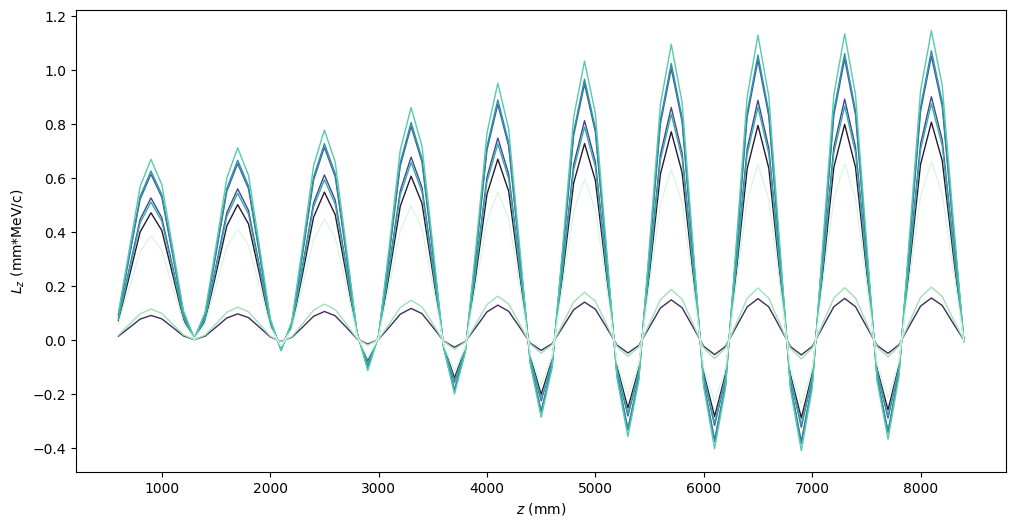

In [89]:
# Subplot Lz for each event:
plt.figure(figsize=(12,6))
cmap = sns.color_palette("mako", as_cmap=True)
colors = cmap(np.linspace(0, 1, nEvents))
for j in range(len(np.unique(EventIDs))):
    Lz_select_vals = []
    z_select_vals = []
    for i in range(len(z_vals)):
        if EventIDs[i] == j:
            Lz_select_vals.append(Lz_vals[i])
            z_select_vals.append(z_vals[i])
    plt.plot(z_select_vals,Lz_select_vals,color=colors[j],linewidth=1)
plt.xlabel('$z$ (mm)')
plt.ylabel('$L_z$ (mm*MeV/c)')
plt.savefig(dir+'beam_angular_momentum.png',dpi=300)
plt.show()

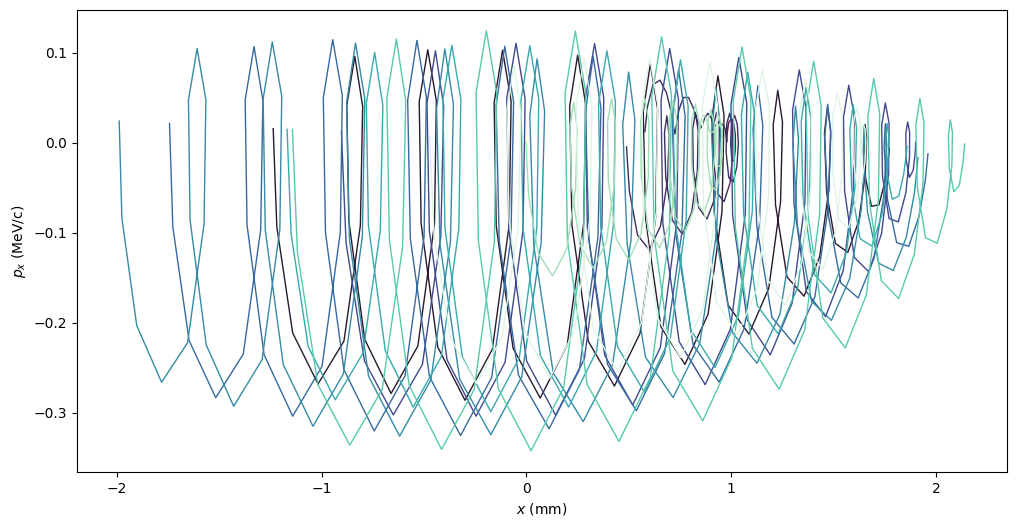

In [90]:
# Subplot phase space (x) trajectory for each event:
plt.figure(figsize=(12,6))
cmap = sns.color_palette("mako", as_cmap=True)
colors = cmap(np.linspace(0, 1, nEvents))
for j in range(len(np.unique(EventIDs))):
    px_select_vals = []
    x_select_vals = []
    for i in range(len(z_vals)):
        if EventIDs[i] == j:
            px_select_vals.append(px_vals[i])
            x_select_vals.append(x_vals[i])
    plt.plot(x_select_vals,px_select_vals,color=colors[j],linewidth=1)
plt.xlabel('$x$ (mm)')
plt.ylabel('$p_x$ (MeV/c)')
plt.show()

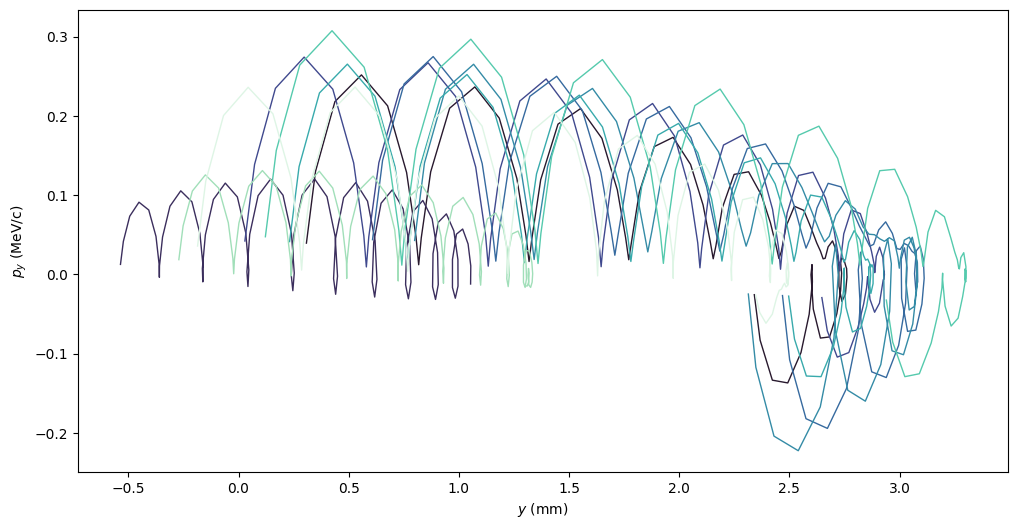

In [91]:
# Subplot phase space (y) trajectory for each event:
plt.figure(figsize=(12,6))
cmap = sns.color_palette("mako", as_cmap=True)
colors = cmap(np.linspace(0, 1, nEvents))
for j in range(len(np.unique(EventIDs))):
    py_select_vals = []
    y_select_vals = []
    for i in range(len(z_vals)):
        if EventIDs[i] == j:
            py_select_vals.append(py_vals[i])
            y_select_vals.append(y_vals[i])
    plt.plot(y_select_vals,py_select_vals,color=colors[j],linewidth=1)
plt.xlabel('$y$ (mm)')
plt.ylabel('$p_y$ (MeV/c)')
plt.show()